In [171]:

import pickle
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from projection_utils import *
from tqdm import tqdm
import pandas as pd
import math
import pandas as pd

In [172]:
points = np.load('/home/yucheng/storage/data/0731/test_gilman_04/points/0022.npy')
img_path = '/home/yucheng/storage/data/0731/test_gilman_04/img_detection/0022.png'
img = np.asanyarray(Image.open(img_path).resize((1920, 1080)))
points
DF = pd.DataFrame(points)
DF.to_csv("points.csv")


In [173]:
# points = np.array([[10, 0, 1]])

In [174]:
# points[:, 1] = - points[:, 1]

In [175]:
df_describe = pd.DataFrame(points)
df_describe.describe()

,0,1,2,3
count,65536.000000,65536.000000,65536.000000,65536.0
mean,-3.880890,-0.219008,0.274362,0.0
std,11.906220,15.069624,2.202844,0.0
min,-135.005997,-135.931580,-6.622687,0.0
25%,-3.040990,-0.709757,-0.529399,0.0
50%,0.000000,-0.000000,0.000000,0.0
75%,0.702442,1.012474,0.050500,0.0
max,16.319443,113.590042,34.364990,0.0


In [176]:
print(points)
lidar_image = lidar2CameraOurs(points[:, [1, 2, 0]])[:,[1,0]]

[[ 0.841065 -0.045992  0.251267  0.      ]
 [ 0.861126 -0.01443   0.247121  0.      ]
 [ 0.847056  0.017447  0.234163  0.      ]
 ...
 [ 0.       -0.       -0.        0.      ]
 [ 0.        0.       -0.        0.      ]
 [ 0.        0.       -0.        0.      ]]


/home/yucheng/workspace/WCSNG/point_vis/projection/projection_utils.py:12: RuntimeWarning: invalid value encountered in double_scalars
  x = point[0] / point[2]
/home/yucheng/workspace/WCSNG/point_vis/projection/projection_utils.py:13: RuntimeWarning: invalid value encountered in double_scalars
  y = point[1] / point[2]


In [177]:
pts = torch.tensor([[10, 10,  1]])
lidar2CameraOurs(pts[:, [1, 2, 0]])

array([[2328.37866211,  392.64630127]])

In [178]:
# lidar_image
# plt.imshow(img)
# for lidat_img_point in lidar_image:
#     print(lidat_img_point)
#     plt.plot(lidat_img_point[1], lidat_img_point[0], "og", markersize=10)

100%|██████████| 65536/65536 [00:00<00:00, 364934.17it/s]


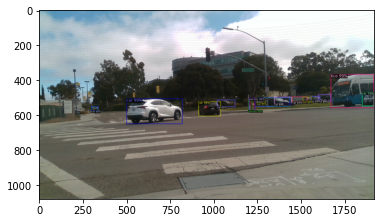

In [179]:
radius = 3
for i in tqdm(range(lidar_image.shape[0])):
    if not math.isnan(lidar_image[i][0]) and not math.isnan(lidar_image[i][1]):
        x = int(lidar_image[i][0])
        y = int(lidar_image[i][1])
        if x >= 0 and x < img.shape[0] and\
           y >= 0 and y < img.shape[1]:
            img[x, y, :] = 256
plt.imsave('img.png', img)
plt.imshow(img)